In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split


In [2]:
data = "C:/Users/danie/Documents/EPFL MA1/Fall 1/Machine Learning/Carbon Analysis Project/data"

In [3]:
df_meas = pd.read_csv(data + "/IMPROVE_2015_measures_cs433.csv")
df_spec = pd.read_csv(data + "/IMPROVE_2015_raw_spectra_cs433.csv")
df_split = pd.read_csv(data + "/IMPROVE_2015_train_test_split_cs433.csv")
df_derive = pd.read_csv(data + "/IMPROVE_2015_2nd-derivative_spectra_cs433.csv")

### Data Exploration

In [4]:
df_meas.head()

,Unnamed: 0,site,SiteCode,Date,flag,Latitude,Longitude,ECf:Value,ECf:Unc,MF:Value,MF:Unc,OCf:Value,OCf:Unc,SO4f:Value,SO4f:Unc,NO3f:Value,NO3f:Unc,DUSTf:Value,DUSTf:Unc
0,0,CRLA1_04_21_2015_NM_0_csv,CRLA1,20150421,NM,42.8958,-122.1361,1.844414,1.023308,76.541793,2.718720,23.343977,3.196060,6.800987,0.142307,1.642580,0.095802,8.725530,0.758188
1,1,TONT1_05_09_2015_NM_0_csv,TONT1,20150509,NM,33.6548,-111.1068,0.218577,0.203142,23.273289,1.597004,3.774399,0.868154,3.132621,0.075339,2.733602,0.136727,4.686666,0.445060
2,2,BADL1_11_26_2015_NM_0_csv,BADL1,20151126,NM,43.7435,-101.9412,0.057109,0.178062,11.188888,1.473206,1.902453,0.738827,4.275544,0.113381,2.193672,0.136355,1.007311,0.121622
3,3,BRID1_10_27_2015_NM_0_csv,BRID1,20151027,NM,42.9749,-109.7579,0.090872,0.144012,6.564180,1.504830,1.569566,0.834177,0.788829,0.036832,0.556859,0.107056,0.337955,0.107560
4,4,SEQU1_04_03_2015_NM_0_csv,SEQU1,20150403,NM,36.4894,-118.8291,1.623977,0.971745,60.448977,2.306680,16.223032,2.258965,8.185925,0.169281,7.541357,0.309728,8.532945,0.735361


In [5]:
df_meas = df_meas.set_index("site")

In [6]:
df_OC = pd.DataFrame(df_meas[["OCf:Value","OCf:Unc"]]) #df_meas.loc[df_meas.flag == "NM",["OCf:Value","OCf:Unc"]] 


In [7]:
df_spec.head()

,wavenumber,ACAD1_01_06_2015_NM_0_csv,ACAD1_01_09_2015_NM_0_csv,ACAD1_01_12_2015_NM_0_csv,ACAD1_01_15_2015_NM_0_csv,ACAD1_01_18_2015_NM_0_csv,ACAD1_01_21_2015_NM_0_csv,ACAD1_01_24_2015_NM_0_csv,ACAD1_01_27_2015_NM_0_csv,ACAD1_01_30_2015_NM_0_csv,...,YOSE1_07_02_2015_FB_0_csv,YOSEX_01_15_2015_FB_0_csv,YOSEX_02_05_2015_FB_0_csv,YOSEX_05_21_2015_FB_0_csv,YOSEX_06_11_2015_FB_0_csv,YOSEX_09_03_2015_FB_0_csv,YOSEX_10_15_2015_FB_0_csv,YOSEX_11_05_2015_FB_0_csv,ZICA1_08_13_2015_FB_0_csv,ZICA1_09_03_2015_FB_0_csv
0,3998.423206,0.35778,0.58858,0.55091,0.49739,0.46597,0.42318,0.41571,0.34475,0.62313,...,0.24296,0.29209,0.40211,0.63614,0.54269,0.67122,0.53922,0.64828,0.40594,0.52207
1,3997.137539,0.35760,0.58832,0.55055,0.49715,0.46570,0.42296,0.41546,0.34452,0.62289,...,0.24282,0.29193,0.40188,0.63588,0.54250,0.67098,0.53898,0.64796,0.40579,0.52184
2,3995.851872,0.35743,0.58806,0.55019,0.49690,0.46543,0.42273,0.41520,0.34430,0.62265,...,0.24269,0.29177,0.40166,0.63563,0.54231,0.67074,0.53873,0.64762,0.40565,0.52161
3,3994.566206,0.35725,0.58781,0.54984,0.49665,0.46516,0.42250,0.41493,0.34407,0.62240,...,0.24255,0.29161,0.40143,0.63538,0.54213,0.67051,0.53848,0.64729,0.40550,0.52138
4,3993.280539,0.35708,0.58756,0.54948,0.49640,0.46489,0.42227,0.41466,0.34384,0.62215,...,0.24241,0.29145,0.40120,0.63512,0.54196,0.67027,0.53823,0.64696,0.40535,0.52114


### Data Processing

In [8]:
df_spec = df_spec.T

In [9]:
df_spec.head()

,0,1,2,3,4,5,6,7,8,9,...,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783
wavenumber,3998.423206,3997.137539,3995.851872,3994.566206,3993.280539,3991.994872,3990.709206,3989.423539,3988.137873,3986.852206,...,431.983986,430.698320,429.412653,428.126986,426.841320,425.555653,424.269986,422.984320,421.698653,420.412987
ACAD1_01_06_2015_NM_0_csv,0.357780,0.357600,0.357430,0.357250,0.357080,0.356890,0.356710,0.356520,0.356340,0.356150,...,-0.074765,-0.074292,-0.073728,-0.073047,-0.072208,-0.071185,-0.069949,-0.068499,-0.066864,-0.065079
ACAD1_01_09_2015_NM_0_csv,0.588580,0.588320,0.588060,0.587810,0.587560,0.587310,0.587070,0.586820,0.586570,0.586320,...,-0.099660,-0.099046,-0.098279,-0.097314,-0.096101,-0.094638,-0.092941,-0.091018,-0.088871,-0.086477
ACAD1_01_12_2015_NM_0_csv,0.550910,0.550550,0.550190,0.549840,0.549480,0.549120,0.548750,0.548380,0.548010,0.547640,...,-0.095560,-0.095277,-0.094907,-0.094408,-0.093729,-0.092851,-0.091786,-0.090555,-0.089180,-0.087647
ACAD1_01_15_2015_NM_0_csv,0.497390,0.497150,0.496900,0.496650,0.496400,0.496150,0.495900,0.495640,0.495390,0.495150,...,-0.105530,-0.105590,-0.105570,-0.105420,-0.105160,-0.104810,-0.104370,-0.103790,-0.103030,-0.102080


#  Merge IR spectra with Measure Data Frame
This will ensure that the data points are aligned by the label

In [10]:
pd_merge = df_OC.merge(df_spec, right_index=True, left_index=True)

In [11]:
df_split = df_split.set_index("site", drop=True).drop(["Unnamed: 0"], axis=1)

In [12]:
pd_merge_again = pd_merge.merge(df_split, right_index=True, left_index=True)

In [13]:
pd_merge_again["OCf:Value"]

CRLA1_04_21_2015_NM_0_csv       23.343977
TONT1_05_09_2015_NM_0_csv        3.774399
BADL1_11_26_2015_NM_0_csv        1.902453
BRID1_10_27_2015_NM_0_csv        1.569566
SEQU1_04_03_2015_NM_0_csv       16.223032
PINN1_08_04_2015_NM_QC_0_csv     1.969049
PINN1_08_04_2015_NM_0_csv        1.969049
BRIS1_12_17_2015_NM_0_csv        9.704800
BRCA1_04_15_2015_NM_0_csv        1.304018
WHIT1_12_14_2015_NM_0_csv        1.178174
DOME1_08_31_2015_NM_0_csv       24.109274
GLAC1_04_09_2015_NM_0_csv        7.833412
LOST1_03_07_2015_NM_0_csv        3.838577
MAKA2_03_31_2015_NM_0_csv        0.127425
ELLI1_08_13_2015_NM_2_0_csv     16.295581
BADL1_10_09_2015_NM_0_csv       21.264523
MOZI1_04_15_2015_NM_0_csv        1.834183
IKBA1_01_06_2015_NM_0_csv        4.680329
SHEN1_02_08_2015_NM_0_csv       16.457420
PHOE5_11_23_2015_NM_0_csv       35.038568
MORA1_04_21_2015_NM_0_csv        8.615637
BYIS1_08_07_2015_NM_0_csv        1.922358
SIPS1_08_01_2015_NM_0_csv       13.305918
NOCA1_10_06_2015_NM_0_csv       16

In [14]:
set_train = pd_merge_again[pd_merge_again["usage"] == "calibration"]


In [15]:
set_test = pd_merge_again[pd_merge_again["usage"] == "test"]

In [16]:
df_OCU_tr = set_train["OCf:Unc"]
df_OCU_te = set_test["OCf:Unc"]

In [185]:
y_tr = set_train["OCf:Value"]
y_te = set_test["OCf:Value"]
x_tr = set_train.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te = set_test.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

### LinearRegression

In [18]:
lr = LinearRegression()

In [55]:
cross_val_score(lr, x_tr, y_tr, cv=3)

array([0.97329975, 0.980349  , 0.981138  ])

In [65]:
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)

Text(0, 0.5, 'Predicted y')

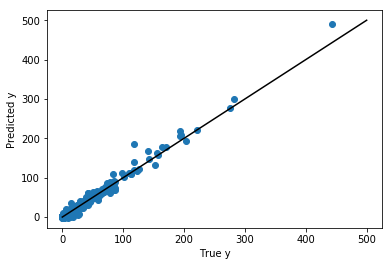

In [67]:
plt.scatter(y_te,y_pred_te)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [68]:
r2_score(y_te,y_pred_te)

0.9756956784630024

In [20]:
#bias_tr = (y_tr - y_pred_tr) / df_OCU_tr
bias_te = (y_te - y_pred_te) / df_OCU_te

NameError: name 'y_pred_te' is not defined

In [19]:
SNR_tr = y_tr / df_OCU_tr
SNR_te = y_te / df_OCU_te

Text(0, 0.5, 'bias')

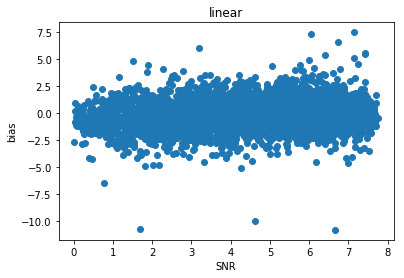

In [71]:
plt.scatter(SNR_te,bias_te)
plt.title("linear")
plt.xlabel("SNR")
plt.ylabel("bias")

### Ridge regression

In [19]:
ridge = Ridge(alpha=1e-7)

In [630]:
cross_val_score(ridge,x_tr,y_tr, cv=10)

array([0.96034018, 0.97338227, 0.98764913, 0.9838716 , 0.97640509,
       0.98800678, 0.98294154, 0.98752153, 0.9901491 , 0.98282066])

In [20]:
ridge.fit(x_tr,y_tr)
ridge.fit(x_te,y_te)
y_pred_tr_ridge = ridge.predict(x_tr)
y_pred_te_ridge = ridge.predict(x_te)

Text(0, 0.5, 'Predicted y')

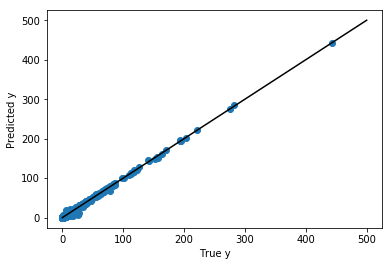

In [21]:
plt.scatter(y_te,y_pred_te_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")


In [633]:
r2_score(y_te,y_pred_te_ridge)

0.9934309407327009

Text(0, 0.5, 'bias')

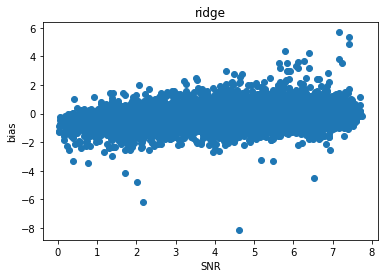

In [24]:
bias_tr_ridge = (y_tr - y_pred_tr_ridge) / df_OCU_tr
bias_te_ridge = (y_te - y_pred_te_ridge) / df_OCU_te
plt.scatter(SNR_te,bias_te_ridge)
plt.title("ridge")
plt.xlabel("SNR")
plt.ylabel("bias")

### Neural Network

In [39]:
nn = MLPRegressor(hidden_layer_sizes=(800,100,5), activation='relu', solver='adam', alpha=1e-6, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
#nn.hidden_layer_sizes=(100, )
#nn.(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [40]:
nn.fit(x_tr,y_tr)

MLPRegressor(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.3, verbose=False, warm_start=False)

In [41]:
y_pred_tr_nn = nn.predict(x_tr)
y_pred_te_nn = nn.predict(x_te)

Text(0, 0.5, 'Predicted y')

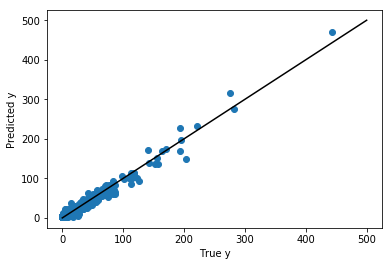

In [42]:
plt.scatter(y_te,y_pred_te_nn)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [43]:
r2_score(y_tr,y_pred_tr_nn)

0.9632342618059518

Text(0, 0.5, 'bias')

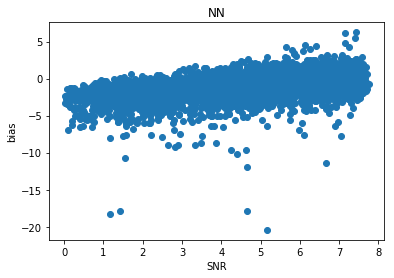

In [31]:
bias_tr_nn = (y_tr - y_pred_tr_nn) / df_OCU_tr
bias_te_nn = (y_te - y_pred_te_nn) / df_OCU_te
plt.scatter(SNR_te,bias_te_nn)
plt.title("NN")
plt.xlabel("SNR")
plt.ylabel("bias")

### 2nd derivative

In [20]:
df_derive = df_derive.T

In [21]:
pd_der_merge = df_OC.merge(df_derive, right_index=True, left_index=True)

In [22]:
df_split.head(9)

,usage
site,
CRLA1_04_21_2015_NM_0_csv,calibration
TONT1_05_09_2015_NM_0_csv,calibration
BADL1_11_26_2015_NM_0_csv,calibration
BRID1_10_27_2015_NM_0_csv,calibration
SEQU1_04_03_2015_NM_0_csv,calibration
PINN1_08_04_2015_NM_QC_0_csv,calibration
BRIS1_12_17_2015_NM_0_csv,calibration
BRCA1_04_15_2015_NM_0_csv,calibration
ORPI1_09_03_2015_FB_0_csv,calibration


In [23]:
pd_der_again = pd_der_merge.merge(df_split, right_index=True, left_index=True)

In [24]:
set_train_der = pd_der_again[pd_der_again["usage"] == "calibration"]

In [25]:
set_test_der = pd_der_again[pd_der_again["usage"] == "test"]

In [26]:
y_tr_der = set_train_der["OCf:Value"]
y_te_der = set_test_der["OCf:Value"]
x_tr_der = set_train_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te_der = set_test_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [27]:
lr.fit(x_tr_der,y_tr_der)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
der_predict_tr = lr.predict(x_tr_der)

Text(0,0.5,'Predicted y')

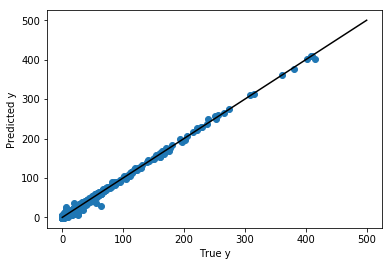

In [178]:
plt.scatter(y_tr,der_predict_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [179]:
r2_score(y_tr,der_predict_tr)

0.9938977307958035

In [186]:
x_tr_der[x_tr_der.index.contains("_NM_")]

CRLA1_04_21_2015_NM_0_csv      -1.664240e-07
TONT1_05_09_2015_NM_0_csv      -2.567684e-07
BADL1_11_26_2015_NM_0_csv      -3.991203e-07
BRID1_10_27_2015_NM_0_csv       4.606378e-08
SEQU1_04_03_2015_NM_0_csv       9.093881e-08
PINN1_08_04_2015_NM_QC_0_csv   -6.154715e-07
BRIS1_12_17_2015_NM_0_csv      -3.292817e-07
BRCA1_04_15_2015_NM_0_csv       9.093881e-08
WHIT1_12_14_2015_NM_0_csv      -8.321198e-09
DOME1_08_31_2015_NM_0_csv       1.444322e-07
GLAC1_04_09_2015_NM_0_csv       3.661327e-07
LOST1_03_07_2015_NM_0_csv      -3.209605e-07
MAKA2_03_31_2015_NM_0_csv      -4.763886e-07
ELLI1_08_13_2015_NM_2_0_csv    -2.169455e-08
BADL1_10_09_2015_NM_0_csv      -1.845523e-07
MOZI1_04_15_2015_NM_0_csv       9.331629e-08
IKBA1_01_06_2015_NM_0_csv      -4.332967e-07
SHEN1_02_08_2015_NM_0_csv      -1.393801e-07
PHOE5_11_23_2015_NM_0_csv      -2.835151e-07
MORA1_04_21_2015_NM_0_csv      -1.227377e-07
BYIS1_08_07_2015_NM_0_csv      -3.269042e-07
SIPS1_08_01_2015_NM_0_csv      -4.009034e-07
NOCA1_10_0

## Clustering

In [469]:

km = KMeans(n_clusters=2,random_state=0)
region_cluster=range(1600,2300) #must be between 0, 2784
#km.fit(x_tr.iloc[:,region_cluster])
km.fit(x_tr_der.iloc[:,region_cluster]**2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

## Linear Regression of Clusters


In [542]:
def train(x_trr,y_trr,kmm,reg_type):
    """This will find the regression coefficients for each cluster in x_tr.
        It will output a list of linear regression classes. Each element contains hyperparameters for each cluster"""
    
    regressions_list = [ eval(reg_type) for i in range(km.n_clusters)]
    
    for cluster in range(kmm.n_clusters):
        
        cluster_indices=np.argwhere( kmm.labels_ == cluster).flatten()
        
        regressions_list[cluster].fit(x_trr.iloc[cluster_indices,:],y_trr[cluster_indices])
    
    return regressions_list

In [543]:
def predict_OC(x,k_means,reg_list,*argv):
    """ Function takes k_means class already containing clusters as k_means.
        Also takes linear regression list of lr classes of size equal to number of clusters
        Takes in x values and outputs predicted ys by classifying x in clusters and predicting their y value
        with linear regression"""
    if argv ==0:
        x_clus=x
    else:
        x_clus=argv[0]
    labels_=k_means.predict(x_clus) #do clustering
    y=np.zeros(x.shape[0])
    
    for cluster in range(k_means.n_clusters):
        indices=np.argwhere( labels_ == cluster).flatten()
        y[indices]=reg_list[cluster].predict(x.iloc[indices,:])
    return y

In [472]:
reg_list=train(x_tr_der,y_tr,km,'LinearRegression')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [473]:
y_pred_tr_cl=predict_OC(x_tr_der,km,reg_list,x_tr_der.iloc[:,region_cluster]**2)
y_pred_te_cl=predict_OC(x_te_der,km,reg_list,x_te_der.iloc[:,region_cluster]**2)

#y_pred_tr_cl=predict_OC(x_tr,km,reg_list,x_tr.iloc[:,region_cluster])
#y_pred_te_cl=predict_OC(x_te,km,reg_list,x_te.iloc[:,region_cluster])


(13362,)
(4646,)


# Cluster Plots 

Text(0, 0.5, 'Predicted y')

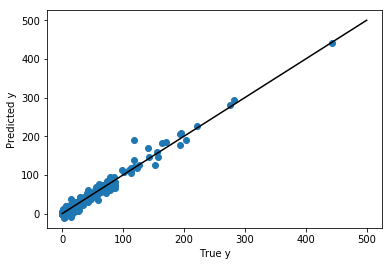

In [474]:
plt.scatter(y_te,y_pred_te_cl)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [475]:
r2_score(y_te,y_pred_te_cl)

0.9709600200534851

In [369]:
def BiasPlot(y_pred,y,y_unc,title):
    """Title must be a string"""
    SNR = y/y_unc
    bias = (y - y_pred)/y_unc 
    plt.scatter(SNR,bias)
    plt.title(title)
    plt.xlabel("SNR")
    plt.ylabel("bias")

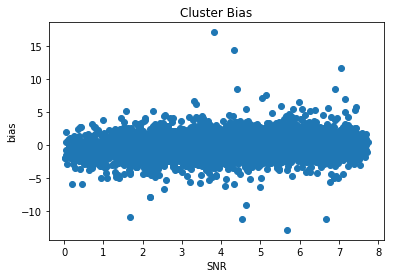

In [476]:
BiasPlot(y_pred_te_cl,y_te, df_OCU_te,title='Cluster Bias')

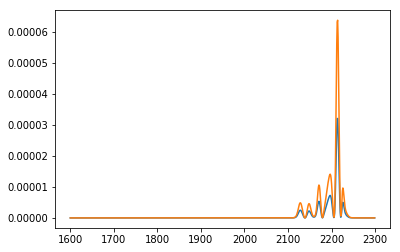

In [470]:
for cluster_center in km.cluster_centers_:
    plt.plot(region_cluster,cluster_center)


## Cross Validation Implementation
Here we will compare the effectiveness of each method by decreasing the training size and observing how well this training size predicts the test (complement of training size). We also compute a bias metric using a moving average of 10% of the data. THe bias metric is the maximum smoothed normalized bias.

In [ ]:
# helping function for comparing bias plot 
def compute_bias_metric_noplot(bias, SNR):
    
    # k = percent of data size for smoothing
    k = 0.1
    bandwidth = round(k*len(SNR))
    MMS = StandardScaler()
    # take only samples with SNR > 2
    SNR_ind2 = np.argwhere(SNR > 2)
    
    # Normalize bias
    #bias_n = MMS.fit_transform(bias[SNR_ind2])#, axis=0)
    bias_n = bias[SNR_ind2] / y_tr[SNR_ind2]
    
    # Smoother = Moving average, bandwidth of 10% of Data
    y = pd.DataFrame(bias_n).rolling(bandwidth).mean()
    return np.max(np.abs(y))

In [ ]:
def cross_validation_sample_size(x_tr,y_tr,y_uc,regression_method,k_fold,seed):
    """Splits training data into train and test. 
    Train size is given by sample size.
    Does inverted k-fold because train sample is smallest:
    For example if the k_fold is 4, 1/4th of the data will be train, and 3/4th will be test. 
    """
    reg=eval(regression_method)
    indices=build_k_indices(y_tr,k_fold,seed)
    avg_mse = 0
    avg_r2 = 0
    avg_bias = 0
    
    for k in range(k_fold):
            #training sub data
            x_tr_sub = x_tr.iloc[indices[k],:]
            y_tr_sub = y_tr[indices[k]]
            

            #drop training indices, select test subdata
            #indices_ = np.delete(indices, (k), axis=0).flatten() #Take the complement of the data as test
            indices_ = np.delete(indices, (k), axis=0).flatten()[:int(len(y_tr)/2)] #take half of the train data
            x_te_sub = x_tr.iloc[indices_,:]
            y_te_sub = y_tr[indices_]
            y_te_sub_uc = y_uc[indices_] 

            reg.fit(x_tr_sub,y_tr_sub)
            y_te_sub_pred = reg.predict(x_te_sub)
            
            
            #Bias Calculation
            SNR_sub = y_te_sub/y_te_sub_uc
            bias_te_sub = (y_te_sub_pred - y_te_sub) / y_te_sub_uc
            bias_metric = compute_bias_metric_noplot(bias_te_sub,SNR_sub)
            
            #Compute loss and r2
            avg_mse = avg_mse+mean_squared_error(y_te_sub,y_te_sub_pred)
            avg_r2 = avg_r2+ r2_score(y_te_sub, y_te_sub_pred)
            avg_bias = avg_bias + bias_metric
            
            print('Fold # %i Test mean squared error: %.2f' % (k+1,mean_squared_error(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test R2: %.2f' % (k+1,r2_score(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test bias metric: %.2f' % (k+1,bias_metric))
    print('Training Sample Size: ',int(len(y_tr)/k_fold))
    return  avg_mse/k_fold,avg_r2/k_fold,int(len(y_tr)/k_fold),avg_bias/k_fold


In [ ]:
def build_k_indices(y, k_fold, seed):
    
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]

    return np.array(k_indices)

## Linear Regression Comparison 


In [96]:
cross_validation_sample_size(x_tr,y_tr,df_OCU_tr,'LinearRegression()',3,1) 

Fold # 1 Test mean squared error: 13.35
Fold # 1 Test R2: 0.95
Fold # 1 Test bias metric: 1.54
Fold # 2 Test mean squared error: 12.18
Fold # 2 Test R2: 0.97
Fold # 2 Test bias metric: 4.30
Fold # 3 Test mean squared error: 11.51
Fold # 3 Test R2: 0.97
Fold # 3 Test bias metric: 1.54
Training Sample Size:  4454


(12.344328258607254, 0.9615928542906614, 4454, 0    2.46219
 dtype: float64)

We see that the simple linear regression is a lot better than clustering the data with the method above. Also, we see that the derivative smoothing seems to yield better predictive results. 

In [108]:
cross_validation_sample_size(x_tr_der,y_tr,df_OCU_tr,'Ridge(alpha=0.0000001)',3,1)

Fold # 1 Test mean squared error: 5.02
Fold # 1 Test R2: 0.98
Fold # 1 Test bias metric: 0.98
Fold # 2 Test mean squared error: 5.65
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.55
Fold # 3 Test mean squared error: 5.85
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 1.16
Training Sample Size:  4454


(5.505866146487205, 0.9830350823207282, 4454, 0    0.897199
 dtype: float64)

We see that adding a small penalizer really avoids overfitting!However, clustering doesn't do much



In [110]:
cross_validation_sample_size(x_tr_der,y_tr,df_OCU_tr,'Ridge(alpha=0.0000001,normalize=False)',4,1) #increase k_fold

Fold # 1 Test mean squared error: 6.94
Fold # 1 Test R2: 0.97
Fold # 1 Test bias metric: 1.46
Fold # 2 Test mean squared error: 5.84
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 1.16
Fold # 3 Test mean squared error: 6.17
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 1.23
Fold # 4 Test mean squared error: 6.61
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 1.25
Training Sample Size:  3340


(6.388469788934838, 0.9781446939703133, 3340, 0    1.275418
 dtype: float64)

## Lasso  

In [111]:
cross_validation_sample_size(x_tr_der,y_tr,df_OCU_tr,'Lasso(alpha=0.0001,normalize=True,max_iter=2000)',3,1) #

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold # 1 Test mean squared error: 5.01
Fold # 1 Test R2: 0.98
Fold # 1 Test bias metric: 0.83


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold # 2 Test mean squared error: 5.69
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.75
Fold # 3 Test mean squared error: 5.80
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 1.59
Training Sample Size:  4454


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(5.500401165256721, 0.9830555557237762, 4454, 0    1.056107
 dtype: float64)

## Min Sample Size for Ridge 

In [638]:
ks = 9

#mse = np.zeros((ks-2,1))
#r2 = np.zeros((ks-2,1))
mse_vec = []
r2_vec = []
sample_Size_vec = []
for k in range(2,ks):
    k = int(2**k)
    mse,r2,ss=cross_validation_sample_size(x_tr_der,y_tr,'Ridge(alpha=0.0000001,normalize=False)',k,1,1) #increase k_fold
    
    mse_vec.append(mse)
    r2_vec.append(r2)
    sample_Size_vec.append(ss)
    


Fold # 1 Test mean squared error: 6.94
Fold # 1 Test R2: 0.97
Fold # 2 Test mean squared error: 5.84
Fold # 2 Test R2: 0.98
Fold # 3 Test mean squared error: 6.17
Fold # 3 Test R2: 0.98
Fold # 4 Test mean squared error: 6.61
Fold # 4 Test R2: 0.98
Training Sample Size:  3340
Fold # 1 Test mean squared error: 6.36
Fold # 1 Test R2: 0.98
Fold # 2 Test mean squared error: 7.05
Fold # 2 Test R2: 0.97
Fold # 3 Test mean squared error: 6.43
Fold # 3 Test R2: 0.98
Fold # 4 Test mean squared error: 7.67
Fold # 4 Test R2: 0.98
Fold # 5 Test mean squared error: 8.83
Fold # 5 Test R2: 0.97
Fold # 6 Test mean squared error: 6.46
Fold # 6 Test R2: 0.98
Fold # 7 Test mean squared error: 6.55
Fold # 7 Test R2: 0.98
Fold # 8 Test mean squared error: 9.09
Fold # 8 Test R2: 0.97
Training Sample Size:  1670
Fold # 1 Test mean squared error: 9.15
Fold # 1 Test R2: 0.97
Fold # 2 Test mean squared error: 7.08
Fold # 2 Test R2: 0.98
Fold # 3 Test mean squared error: 7.19
Fold # 3 Test R2: 0.98
Fold # 4 Test 

Fold # 3 Test mean squared error: 36.27
Fold # 3 Test R2: 0.89
Fold # 4 Test mean squared error: 23.24
Fold # 4 Test R2: 0.93
Fold # 5 Test mean squared error: 20.99
Fold # 5 Test R2: 0.94
Fold # 6 Test mean squared error: 19.46
Fold # 6 Test R2: 0.94
Fold # 7 Test mean squared error: 20.38
Fold # 7 Test R2: 0.94
Fold # 8 Test mean squared error: 16.41
Fold # 8 Test R2: 0.95
Fold # 9 Test mean squared error: 27.26
Fold # 9 Test R2: 0.92
Fold # 10 Test mean squared error: 34.33
Fold # 10 Test R2: 0.90
Fold # 11 Test mean squared error: 24.97
Fold # 11 Test R2: 0.93
Fold # 12 Test mean squared error: 27.20
Fold # 12 Test R2: 0.92
Fold # 13 Test mean squared error: 11.28
Fold # 13 Test R2: 0.97
Fold # 14 Test mean squared error: 35.46
Fold # 14 Test R2: 0.90
Fold # 15 Test mean squared error: 39.94
Fold # 15 Test R2: 0.88
Fold # 16 Test mean squared error: 18.90
Fold # 16 Test R2: 0.94
Fold # 17 Test mean squared error: 51.56
Fold # 17 Test R2: 0.85
Fold # 18 Test mean squared error: 33.1

Fold # 1 Test mean squared error: 24.00
Fold # 1 Test R2: 0.93
Fold # 2 Test mean squared error: 28.65
Fold # 2 Test R2: 0.91
Fold # 3 Test mean squared error: 32.68
Fold # 3 Test R2: 0.90
Fold # 4 Test mean squared error: 32.83
Fold # 4 Test R2: 0.90
Fold # 5 Test mean squared error: 82.67
Fold # 5 Test R2: 0.75
Fold # 6 Test mean squared error: 40.26
Fold # 6 Test R2: 0.88
Fold # 7 Test mean squared error: 23.41
Fold # 7 Test R2: 0.93
Fold # 8 Test mean squared error: 45.39
Fold # 8 Test R2: 0.86
Fold # 9 Test mean squared error: 23.37
Fold # 9 Test R2: 0.93
Fold # 10 Test mean squared error: 20.65
Fold # 10 Test R2: 0.94
Fold # 11 Test mean squared error: 42.28
Fold # 11 Test R2: 0.87
Fold # 12 Test mean squared error: 24.98
Fold # 12 Test R2: 0.93
Fold # 13 Test mean squared error: 27.22
Fold # 13 Test R2: 0.92
Fold # 14 Test mean squared error: 47.32
Fold # 14 Test R2: 0.86
Fold # 15 Test mean squared error: 15.54
Fold # 15 Test R2: 0.95
Fold # 16 Test mean squared error: 32.39
Fo

Fold # 127 Test mean squared error: 21.55
Fold # 127 Test R2: 0.94
Fold # 128 Test mean squared error: 26.10
Fold # 128 Test R2: 0.92
Fold # 129 Test mean squared error: 23.09
Fold # 129 Test R2: 0.93
Fold # 130 Test mean squared error: 27.47
Fold # 130 Test R2: 0.92
Fold # 131 Test mean squared error: 22.76
Fold # 131 Test R2: 0.93
Fold # 132 Test mean squared error: 56.91
Fold # 132 Test R2: 0.83
Fold # 133 Test mean squared error: 40.73
Fold # 133 Test R2: 0.88
Fold # 134 Test mean squared error: 47.95
Fold # 134 Test R2: 0.86
Fold # 135 Test mean squared error: 37.52
Fold # 135 Test R2: 0.89
Fold # 136 Test mean squared error: 39.60
Fold # 136 Test R2: 0.88
Fold # 137 Test mean squared error: 20.88
Fold # 137 Test R2: 0.94
Fold # 138 Test mean squared error: 23.68
Fold # 138 Test R2: 0.93
Fold # 139 Test mean squared error: 25.82
Fold # 139 Test R2: 0.92
Fold # 140 Test mean squared error: 56.09
Fold # 140 Test R2: 0.83
Fold # 141 Test mean squared error: 167.71
Fold # 141 Test R2:

Fold # 250 Test mean squared error: 55.91
Fold # 250 Test R2: 0.83
Fold # 251 Test mean squared error: 35.62
Fold # 251 Test R2: 0.89
Fold # 252 Test mean squared error: 71.79
Fold # 252 Test R2: 0.78
Fold # 253 Test mean squared error: 25.53
Fold # 253 Test R2: 0.92
Fold # 254 Test mean squared error: 19.73
Fold # 254 Test R2: 0.94
Fold # 255 Test mean squared error: 53.67
Fold # 255 Test R2: 0.84
Fold # 256 Test mean squared error: 116.26
Fold # 256 Test R2: 0.65
Training Sample Size:  52


Text(0, 0.5, 'MSE')

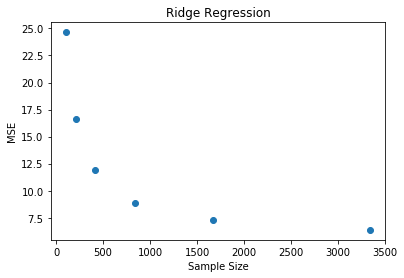

In [639]:
plt.scatter(sample_Size_vec[:-1], mse_vec[:-1])
plt.title('Ridge Regression')
plt.xlabel('Sample Size')
plt.ylabel('MSE')

In [ ]:
#We can still optimize the alpha for the smaller sample sizes and see if the mse can be improved

In [606]:
cross_validation_sample_size(x_tr_der,y_tr,'Ridge(alpha=0.000001,normalize=False)',19,1,1)

Fold # 1 Test mean squared error: 13.60
Fold # 1 Test R2: 0.95
Fold # 2 Test mean squared error: 8.22
Fold # 2 Test R2: 0.97
Fold # 3 Test mean squared error: 14.36
Fold # 3 Test R2: 0.95
Fold # 4 Test mean squared error: 9.97
Fold # 4 Test R2: 0.96
Fold # 5 Test mean squared error: 11.32
Fold # 5 Test R2: 0.96
Fold # 6 Test mean squared error: 9.20
Fold # 6 Test R2: 0.97
Fold # 7 Test mean squared error: 9.70
Fold # 7 Test R2: 0.97
Fold # 8 Test mean squared error: 12.69
Fold # 8 Test R2: 0.96
Fold # 9 Test mean squared error: 10.34
Fold # 9 Test R2: 0.97
Fold # 10 Test mean squared error: 12.08
Fold # 10 Test R2: 0.96
Fold # 11 Test mean squared error: 14.19
Fold # 11 Test R2: 0.95
Fold # 12 Test mean squared error: 16.28
Fold # 12 Test R2: 0.95
Fold # 13 Test mean squared error: 8.70
Fold # 13 Test R2: 0.97
Fold # 14 Test mean squared error: 13.59
Fold # 14 Test R2: 0.96
Fold # 15 Test mean squared error: 17.25
Fold # 15 Test R2: 0.94
Fold # 16 Test mean squared error: 10.35
Fold # 

(12.618729245383387, 0.9578826070318234, 703)

In [607]:
cross_validation_sample_size(x_tr_der,y_tr,'Ridge(alpha=0.00000001,normalize=False)',19,1,1)

Fold # 1 Test mean squared error: 10.08
Fold # 1 Test R2: 0.97
Fold # 2 Test mean squared error: 6.85
Fold # 2 Test R2: 0.98
Fold # 3 Test mean squared error: 7.86
Fold # 3 Test R2: 0.97
Fold # 4 Test mean squared error: 6.54
Fold # 4 Test R2: 0.98
Fold # 5 Test mean squared error: 7.10
Fold # 5 Test R2: 0.98
Fold # 6 Test mean squared error: 9.00
Fold # 6 Test R2: 0.97
Fold # 7 Test mean squared error: 7.31
Fold # 7 Test R2: 0.98
Fold # 8 Test mean squared error: 9.92
Fold # 8 Test R2: 0.97
Fold # 9 Test mean squared error: 8.39
Fold # 9 Test R2: 0.97
Fold # 10 Test mean squared error: 7.23
Fold # 10 Test R2: 0.98
Fold # 11 Test mean squared error: 7.28
Fold # 11 Test R2: 0.98
Fold # 12 Test mean squared error: 8.33
Fold # 12 Test R2: 0.97
Fold # 13 Test mean squared error: 9.59
Fold # 13 Test R2: 0.97
Fold # 14 Test mean squared error: 6.85
Fold # 14 Test R2: 0.98
Fold # 15 Test mean squared error: 7.73
Fold # 15 Test R2: 0.97
Fold # 16 Test mean squared error: 8.02
Fold # 16 Test R2

(8.064736099576976, 0.9729734315848413, 703)

Alpha seems to be optimized at 1e-7

# PCA

In [32]:
# Compute PCA keeping only he n_components
pca = PCA(n_components=100)

In [33]:
# fit and transform train set and transform test set
pca_tr = pca.fit_transform(x_tr)
pca_te = pca.transform(x_te)

In [34]:
#fit linear Regression model on PCA data
lr.fit(pca_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_pred_pca = lr.predict(pca_te)

Text(0, 0.5, 'Predicted y')

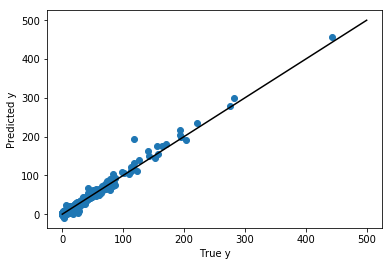

In [36]:
# display plot to see "accuracy" of the model
plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [37]:
r2_score(y_te,y_pred_pca)

0.9795106303753589

Almost as good as when using all the features

In [38]:
# Check performance of pca models with different number of components
max_pca_feat = 100

def compute_scores(X,y):
    """Compute cross-validation on pca model with different number of components"""
    pca = PCA()
    pca_scores = []
    
    for n_feat in range(1,max_pca_feat):
        pca.n_components = n_feat
        pca_scores.append(np.mean(cross_val_score(pca,X,y, cv=3)))
        print(n_feat)
    return pca_scores

In [39]:
# trick: Use pickle to avoid recalculating
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def save_pickle(result, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(result, file)

def features_computation(X,y):
    try:
        return load_pickle('./pca_cv_scores')
    except (FileNotFoundError, EOFError) as e:
        pca_scores = compute_scores(X,y)
        save_pickle(pca_scores, './pca_cv_scores')
        return pca_scores

In [40]:
# compute cv_score of pca models with different number of components
pca_scores = features_computation(x_tr,y_tr)

Text(0.5, 1.0, 'Number of Features')

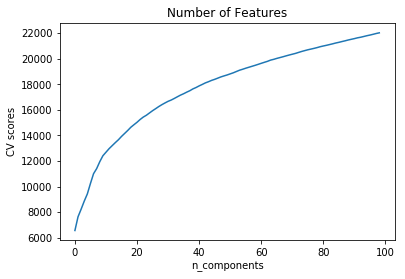

In [41]:
# Display plot to help determine how many features to keep to not lose too much information
plt.plot(pca_scores)
plt.ylabel("CV scores")
plt.xlabel("n_components")
plt.title("Number of Features")

## Training Set Reduction

In [42]:
# Check performance of pca models with diff training set size // n_components = 100 determined in the above cell
def compute_min_set(X,y):
    """Compute cross-validation on pca model with different training set size"""
    
    pca = PCA(n_components=100)
    pca_scores = []
    length = X.shape[0]
    k = 50
    div = round(length/k)
    for i in range(k):
        pca_scores.append(np.mean(cross_val_score(pca,X.iloc[:(1+i)*div,:],y[:(1+i)*div], cv=3)))
        print(i)
    return pca_scores

In [43]:
# compute cv_score of pca model with increasing training set size
min_set_score = compute_min_set(x_tr,y_tr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, 'Training set size')

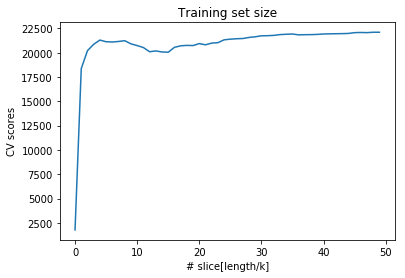

In [44]:
# Display plot
plt.plot(min_set_score)
plt.ylabel("CV scores")
plt.xlabel("# slice[length/k]")
plt.title("Training set size")

In [45]:
# index of the highest to the lowest values
np.argsort(min_set_score)[::-1]

array([49, 48, 46, 47, 45, 44, 43, 42, 41, 40, 35, 34, 39, 33, 38, 37, 36,
       32, 31, 30, 29, 28, 27, 26, 25, 24,  4,  8,  7,  5,  6, 23, 22, 20,
        9,  3, 21, 18, 19, 10, 17, 16, 11,  2, 13, 12, 14, 15,  1,  0],
      dtype=int64)

We can see that, we could take only ~ 8/50 of the train set to get almost the same performance

0.9753447168576164

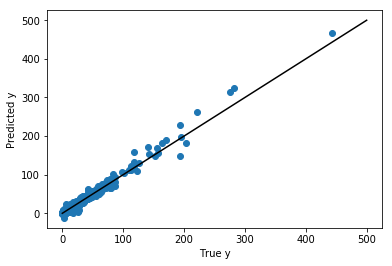

In [46]:
# Test what we found 
pca = PCA(n_components=100)
k = 50
length = x_tr.shape[0]
div = round(length/k)
slices = 8
ind = round(slices*div)
x_train = x_tr.iloc[:ind,:]
y_train = y_tr[:ind]

pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_te)

lr.fit(pca_train, y_train)

y_pred_pca = lr.predict(pca_test)

plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_pca)

0.9753518559295916

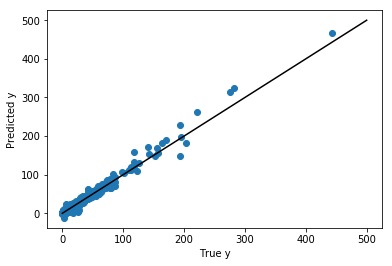

In [49]:
# Test what we found 
pca = PCA(n_components=100)
k = 50
length = x_tr.shape[0]
div = round(length/k)
slices = 8
ind = round(slices*div)
x_train = x_tr.iloc[:ind,:]
y_train = y_tr[:ind]

pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_te)

ridge.fit(pca_train, y_train)

y_pred_pca = ridge.predict(pca_test)

plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_pca)

Text(0, 0.5, 'bias')

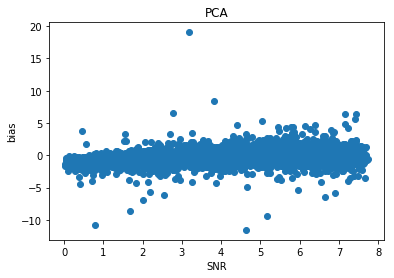

In [51]:
bias_test = (y_te - y_pred_pca) / df_OCU_te

plt.scatter(SNR_te,bias_test)
plt.title("PCA")
plt.xlabel("SNR")
plt.ylabel("bias")

# Field Blank Observation


In [66]:
def index_flag(x,label):
    x = x.values
    
    Comp =[]
    
    for Sample_ID in x:
        splits = Sample_ID.split('_')
        if len(splits)>4:
            flag = splits[4]
        else:
            flag = 'NM'
        Comp.append(flag==label)
    return Comp

In [70]:
idx_FB = index_flag(df_spec.index,'FB')
FBs = df_spec[idx_FB]


In [132]:
"""Standardize FBs Data"""
scaler = StandardScaler()
scaler.fit(FBs)
FBs_Std = scaler.transform(FBs)
scaler2 = StandardScaler()
scaler2.fit(x_tr)
x_tr_std = scaler2.transform(x_tr)

In [148]:
"""Get feature weights"""
reg = Lasso(normalize=True,alpha = 1e-4)
reg.fit(x_tr_std,y_tr)
reg.coef_

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([-0.8881761 , -0.04325856, -0.03967497, ...,  0.        ,
        0.        ,  0.20643482])

In [149]:
"""Find potential cluster points"""
Potential_clusters = abs(scaler.var_/(reg.coef_+1))
Potential_clusters_idx = np.argsort(-Potential_clusters)
Potential_clusters_idx

array([ 904, 2217,    0, ..., 1928, 1930, 1929], dtype=int64)

Text(0.5, 1.0, 'Feature Weights in Normalized Lasso Regression')

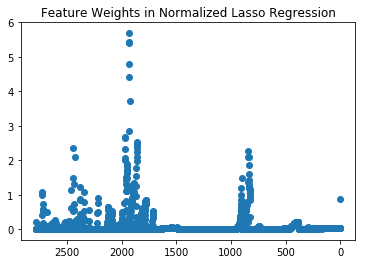

In [158]:
plt.scatter(np.arange(1,len(reg.coef_)+1),abs(reg.coef_))
plt.gca().invert_xaxis()
plt.title('Feature Weights in Normalized Lasso Regression')


In [161]:
sum(reg.coef_!=0)

1102

Text(0.5, 1.0, 'FB variance')

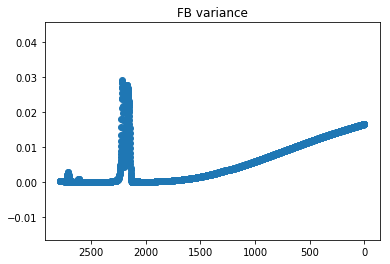

In [159]:
plt.scatter(np.arange(1,len(ridge.coef_)+1),scaler.var_)
plt.gca().invert_xaxis()
plt.title('FB variance')

Text(0.5, 1.0, 'FB variance/Lasso weights')

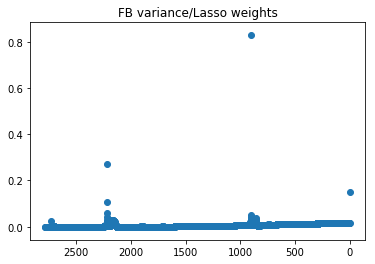

In [160]:
plt.scatter(np.arange(1,len(reg.coef_)+1),Potential_clusters)
plt.gca().invert_xaxis()
plt.title ('FB variance/Lasso weights')

It seems that we can cluster with 2 top 

# Field Blank Observation Derivative

In [ ]:
FBs_der = df_derive[idx_FB]

# Bias Metric (used above in cross_validation section)

In [30]:
# helping function for comparing bias plot 
def compute_bias_metric(bias, SNR,a,b):
    
    # k = percent of data size for smoothing
    k = 0.1
    bandwidth = round(k*len(SNR))
    MMS = StandardScaler()
    # take only samples with SNR > 2
    SNR_ind2 = np.argwhere(SNR > 2)
    
    # Normalize bias
    #bias_n = MMS.fit_transform(bias[SNR_ind2])#, axis=0)
    bias_n = bias[SNR_ind2] 
    # Smoother = Moving average, bandwidth of 10% of Data
    #
    for i in 
    y = pd.DataFrame(bias_n).rolling(window = bandwidth, center = True).mean()
    # Display moving average of normalized bias
    plt.figure(figsize=(16,9))
    plt.scatter(SNR[SNR_ind2], y, s=1)
    plt.ylim([a, b])
    plt.show()
    
    # rerturn max Amplitude
    return print("Max Amplitude: ",np.max(np.abs(y)))

In [31]:
def compute_bias_metric_noplot(bias, SNR):
    
    # k = percent of data size for smoothing
    k = 0.1
    bandwidth = round(k*len(SNR))
    MMS = StandardScaler()
    # take only samples with SNR > 2
    SNR_ind2 = np.argwhere(SNR > 2)
    
    # Normalize bias
    #bias_n = MMS.fit_transform(bias[SNR_ind2])#, axis=0)
    bias_n = bias[SNR_ind2]
      
    
    # Smoother = Moving average, bandwidth of 10% of Data
    y = pd.DataFrame(bias_n).rolling(window = bandwidth, center = True).mean()
    return np.max(np.abs(y))

In [32]:
def cross_validation_sample_size(x_tr,y_tr,y_uc,regression_method,k_fold,seed):
    """Splits training data into train and test. 
    Train size is given by sample size.
    Does inverted k-fold because train sample is smallest:
    For example if the k_fold is 4, 1/4th of the data will be train, and 3/4th will be test. 
    """
    reg=eval(regression_method)
    indices=build_k_indices(y_tr,k_fold,seed)
    avg_mse = 0
    avg_r2 = 0
    avg_bias = 0
    
    for k in range(k_fold):
            #training sub data
            x_tr_sub = x_tr.iloc[indices[k],:]
            y_tr_sub = y_tr[indices[k]]
            

            #drop training indices, select test subdata
            #indices_ = np.delete(indices, (k), axis=0).flatten() #Take the complement of the data as test
            indices_ = np.delete(indices, (k), axis=0).flatten()[:int(len(y_tr)/2)] #take half of the train data
            x_te_sub = x_tr.iloc[indices_,:]
            y_te_sub = y_tr[indices_]
            y_te_sub_uc = y_uc[indices_] 

            reg.fit(x_tr_sub,y_tr_sub)
            y_te_sub_pred = reg.predict(x_te_sub)
            
            
            #Bias Calculation
            SNR_sub = y_te_sub/y_te_sub_uc
            bias_te_sub = (y_te_sub_pred - y_te_sub) / y_te_sub_uc
            bias_metric = compute_bias_metric_noplot(bias_te_sub,SNR_sub)
            
            #Compute loss and r2
            avg_mse = avg_mse+mean_squared_error(y_te_sub,y_te_sub_pred)
            avg_r2 = avg_r2+ r2_score(y_te_sub, y_te_sub_pred)
            avg_bias = avg_bias + bias_metric
            
            print('Fold # %i Test mean squared error: %.2f' % (k+1,mean_squared_error(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test R2: %.2f' % (k+1,r2_score(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test bias metric: %.2f' % (k+1,bias_metric))
    print('Training Sample Size: ',int(len(y_tr)/k_fold))
    return  avg_mse/k_fold,avg_r2/k_fold,int(len(y_tr)/k_fold),avg_bias/k_fold


In [33]:
def cross_validation_regular(x_tr,y_tr,y_uc,regression_method,k_fold,seed):
    """Splits training data into train and test. 
    Train size is given by sample size.
    Does inverted k-fold because train sample is smallest:
    For example if the k_fold is 4, 1/4th of the data will be train, and 3/4th will be test. 
    """
    reg=eval(regression_method)
    indices=build_k_indices(y_tr,k_fold,seed)
    avg_mse = 0
    avg_r2 = 0
    avg_bias = 0
    
    
    for k in range(k_fold):
            #training sub data
            x_te_sub = x_tr.iloc[indices[k],:]
            y_te_sub = y_tr[indices[k]]
            y_te_sub_uc = y_uc[indices[k]]
            

            #drop training indices, select test subdata
            #indices_ = np.delete(indices, (k), axis=0).flatten() #Take the complement of the data as test
            indices_ = np.delete(indices, (k), axis=0).flatten()[:int(len(y_tr)/2)] #take half of the train data
            x_tr_sub = x_tr.iloc[indices_,:]
            y_tr_sub = y_tr[indices_]
            

            reg.fit(x_tr_sub,y_tr_sub)
            y_te_sub_pred = reg.predict(x_te_sub)
            
            
            #Bias Calculation
            SNR_sub = y_te_sub/y_te_sub_uc
            bias_te_sub = (y_te_sub_pred - y_te_sub) / y_te_sub_uc
            bias_metric = compute_bias_metric_noplot(bias_te_sub,SNR_sub)
            
            #Compute loss and r2
            avg_mse = avg_mse+mean_squared_error(y_te_sub,y_te_sub_pred)
            avg_r2 = avg_r2+ r2_score(y_te_sub, y_te_sub_pred)
            avg_bias = avg_bias + bias_metric
            
            print('Fold # %i Test mean squared error: %.2f' % (k+1,mean_squared_error(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test R2: %.2f' % (k+1,r2_score(y_te_sub, y_te_sub_pred)))
            print('Fold # %i Test bias metric: %.2f' % (k+1,bias_metric))
    print('Training Sample Size: ',int(len(y_tr)*(k_fold-1)/k_fold))
    return  avg_mse/k_fold,avg_r2/k_fold,avg_bias/k_fold,int(len(y_tr)*(k_fold-1)/k_fold)

In [34]:
def build_k_indices(y, k_fold, seed):
    
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]

    return np.array(k_indices)

In [35]:
import seaborn as sns

def bias_plot(y_right, y_pred, OCU):
    bias = (y_pred - y_right) / OCU
    SNR = y_right / OCU

    SNR.name = 'SNR'
    bias.name = 'bias'
    pd_plot = pd.concat([SNR, bias], axis=1)


    sns.jointplot("SNR", "bias", data=pd_plot, kind='reg', scatter_kws={"s": 2},
                  joint_kws={'line_kws':{'color':'black'}});

## Linear 

In [36]:
MSE_lin,R2_lin,Biasm_lin,train_size = cross_validation_regular(x_tr,y_tr,df_OCU_tr,'LinearRegression()',4,1) 

Fold # 1 Test mean squared error: 6.79
Fold # 1 Test R2: 0.98
Fold # 1 Test bias metric: 0.20
Fold # 2 Test mean squared error: 6.63
Fold # 2 Test R2: 0.97
Fold # 2 Test bias metric: 0.19
Fold # 3 Test mean squared error: 6.62
Fold # 3 Test R2: 0.97
Fold # 3 Test bias metric: 0.25
Fold # 4 Test mean squared error: 9.75
Fold # 4 Test R2: 0.97
Fold # 4 Test bias metric: 0.17
Training Sample Size:  10021


In [37]:
lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)
bias_tr = (y_pred_tr - y_tr) / df_OCU_tr
bias_te = (y_te - y_pred_te) / df_OCU_te

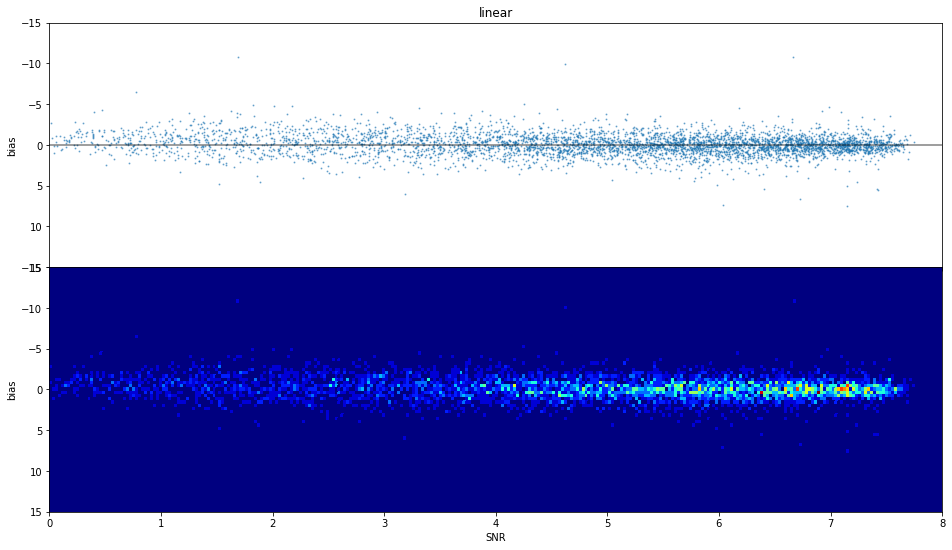

In [33]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_te,bias_te, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_te,bias_te, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("linear")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

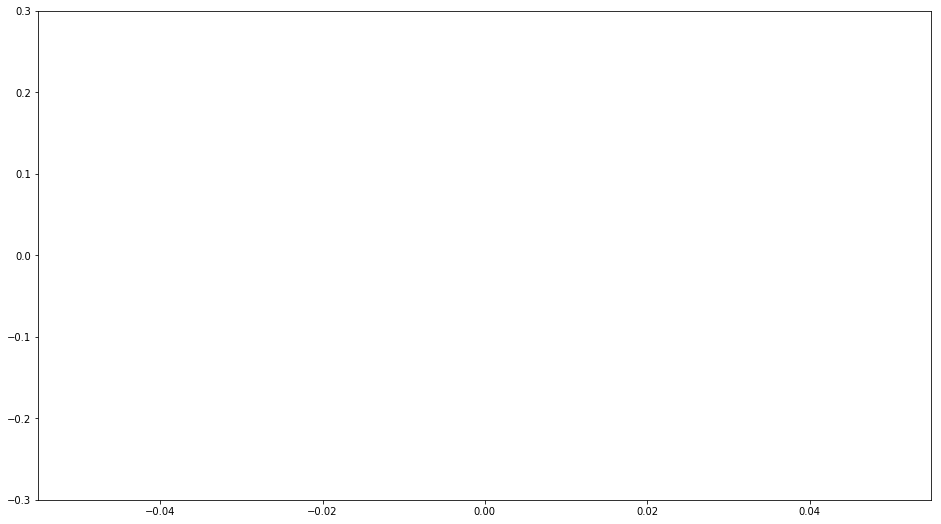

Max Amplitude:  0   NaN
dtype: float64


In [38]:
compute_bias_metric(bias_tr, SNR_tr,-0.3,0.3)

In [ ]:
compute_bias_metric(bias_te, SNR_te,-0.3,0.3)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


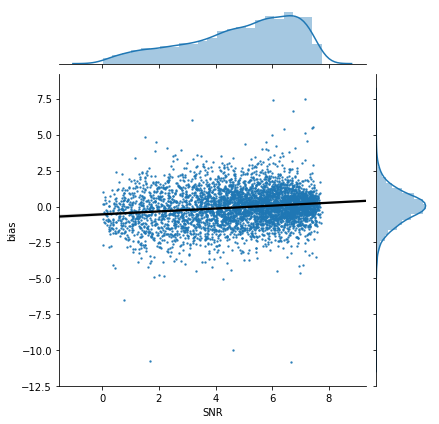

In [36]:
bias_plot(y_te, y_pred_te, df_OCU_te)

## Ridge


In [37]:
MSE_rid,R2_rid,Biasm_rid,train_size  = cross_validation_regular(x_tr,y_tr,df_OCU_tr,'Ridge(alpha=1e-7)',4,1) 

Fold # 1 Test mean squared error: 5.71
Fold # 1 Test R2: 0.99
Fold # 1 Test bias metric: 0.18
Fold # 2 Test mean squared error: 4.88
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.11
Fold # 3 Test mean squared error: 4.98
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 0.14
Fold # 4 Test mean squared error: 6.73
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 0.12
Training Sample Size:  10021


In [61]:
Rdge = Ridge(alpha=1e-7)
Rdge.fit(x_tr,y_tr)
y_pred_tr = Rdge.predict(x_tr)
y_pred_te = Rdge.predict(x_te)
bias_tr = (y_pred_tr - y_tr) / df_OCU_tr
bias_te = (y_te - y_pred_te) / df_OCU_te

In [ ]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_te,bias_te, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_te,bias_te, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("Ridge")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

In [ ]:
compute_bias_metric(bias_tr, SNR_tr,-0.3,0.3)

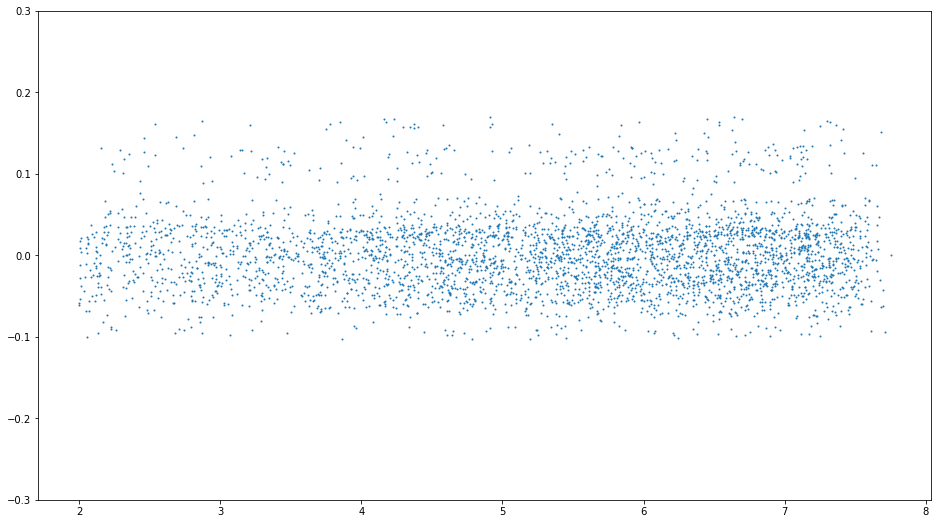

Max Amplitude:  0    0.169899
dtype: float64


In [62]:
compute_bias_metric(bias_te, SNR_te,-0.3,0.3)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


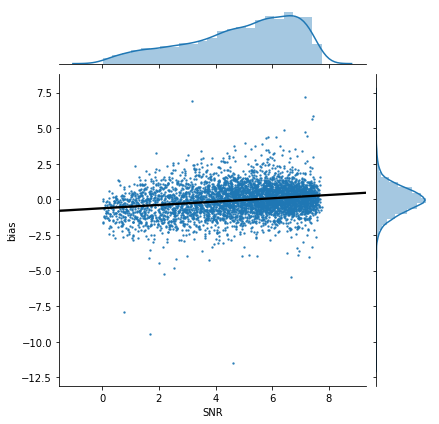

In [60]:
bias_plot(y_te, y_pred_te, df_OCU_te)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


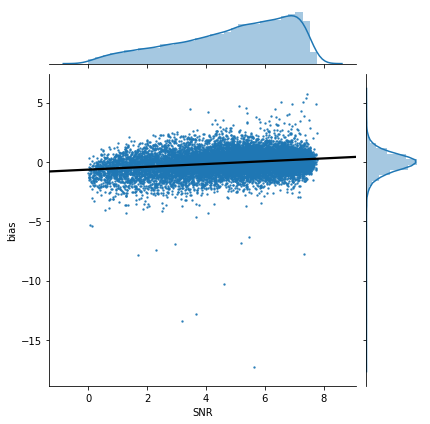

In [63]:
bias_plot(y_tr, y_pred_tr, df_OCU_tr)

# PCA 

0.9796315997572071

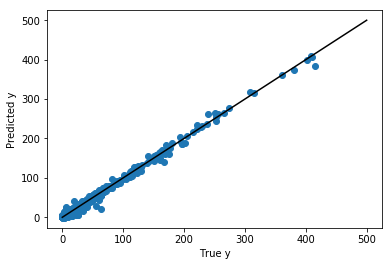

In [189]:
pca = PCA(n_components=1000)

pca_tr = pca.fit_transform(x_tr)
pca_te = pca.transform(x_te)
lr.fit(pca_tr, y_tr)

y_pred_tr = lr.predict(pca_tr)
y_pred_te = lr.predict(pca_te)

plt.scatter(y_tr,y_pred_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_te)

In [164]:
SE_lin_pca,R2_lin_pca,Biasm_lin_pca,train_size = cross_validation_regular(pd.DataFrame(pca_tr),y_tr,df_OCU_tr,'LinearRegression()',4,1) 

Fold # 1 Test mean squared error: 6.45
Fold # 1 Test R2: 0.98
Fold # 1 Test bias metric: 0.22
Fold # 2 Test mean squared error: 5.24
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.12
Fold # 3 Test mean squared error: 5.83
Fold # 3 Test R2: 0.97
Fold # 3 Test bias metric: 0.15
Fold # 4 Test mean squared error: 7.18
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 0.15
Training Sample Size:  10021


In [166]:
bias_tr = (y_pred_tr - y_tr) / df_OCU_tr
bias_te = (y_pred_te - y_te) / df_OCU_te

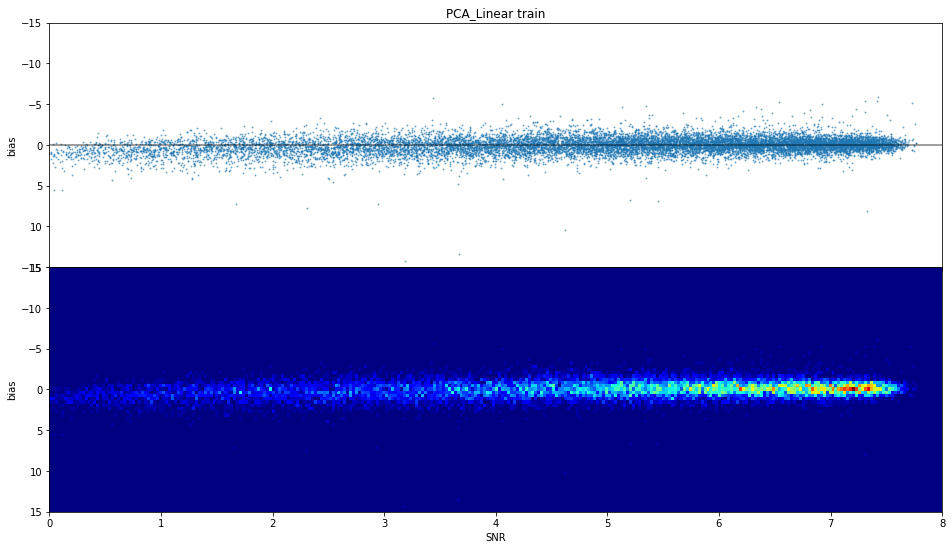

In [167]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCA_Linear train")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

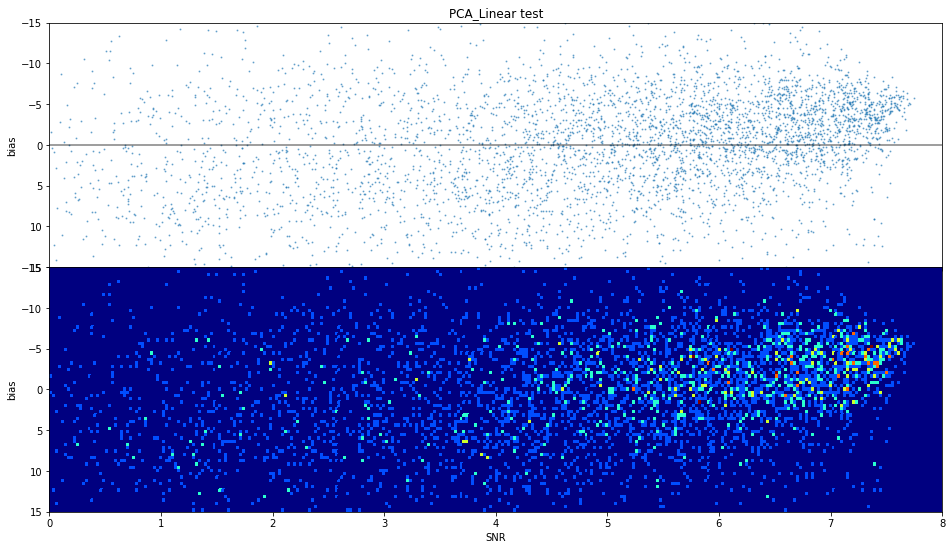

In [168]:
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_te,bias_te, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_te,bias_te, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCA_Linear test")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

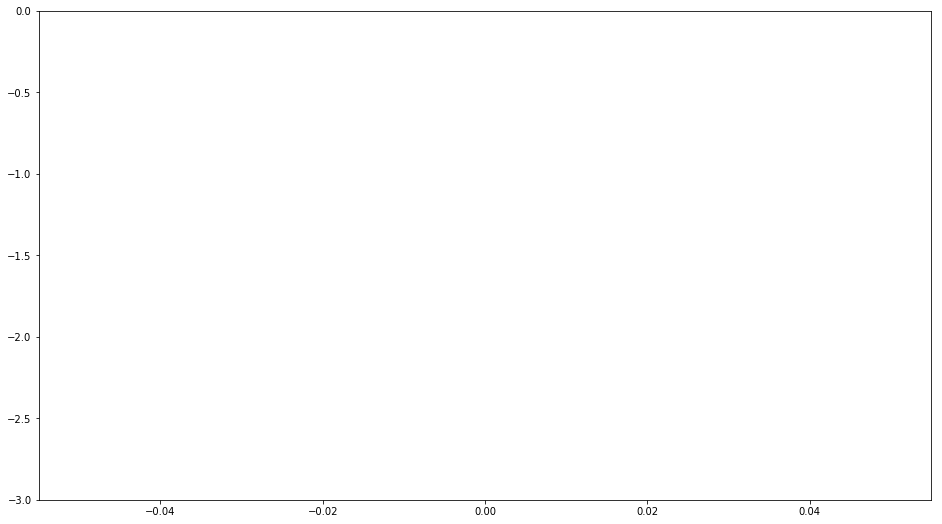

Max Amplitude:  0   NaN
dtype: float64


In [169]:
compute_bias_metric(bias_te, SNR_te,-3,0   )

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


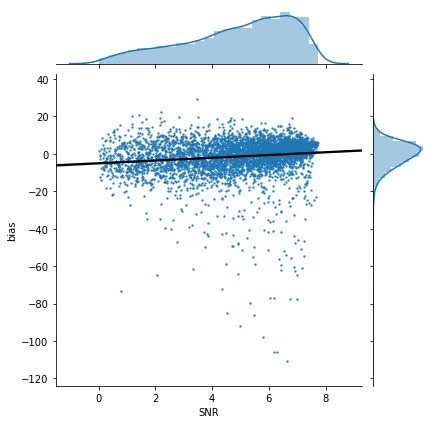

In [170]:
bias_plot(y_te, y_pred_te, df_OCU_te)

# PCA with Ridge

0.9816038432398005

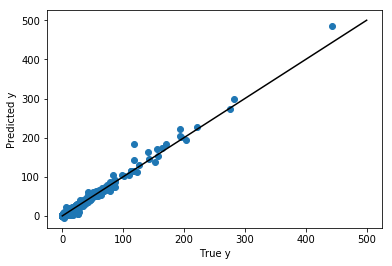

In [191]:
Rdge = RidgeCV(alphas=(1e-2,1e-3,1e-4,1e-5,1e-6,1e-7))
Rdge.fit(pca_tr, y_tr)

y_pred_tr = Rdge.predict(pca_tr)
y_pred_te = Rdge.predict(pca_te)

plt.scatter(y_te,y_pred_te)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_te)

In [192]:
MSE_rid_pca,R2_rid_pca,Biasm_rid_pca,train_size = cross_validation_regular(pd.DataFrame(pca_tr),y_tr,df_OCU_tr,'Ridge(alpha=1e-3)',4,1)  #changed alpha to 1e-3

Fold # 1 Test mean squared error: 5.52
Fold # 1 Test R2: 0.99
Fold # 1 Test bias metric: 0.16
Fold # 2 Test mean squared error: 5.85
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.12
Fold # 3 Test mean squared error: 4.56
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 0.20
Fold # 4 Test mean squared error: 5.69
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 0.13
Training Sample Size:  10021


In [178]:
bias_tr = (y_pred_tr - y_tr) / df_OCU_tr
bias_te = (y_te - y_pred_te) / df_OCU_te

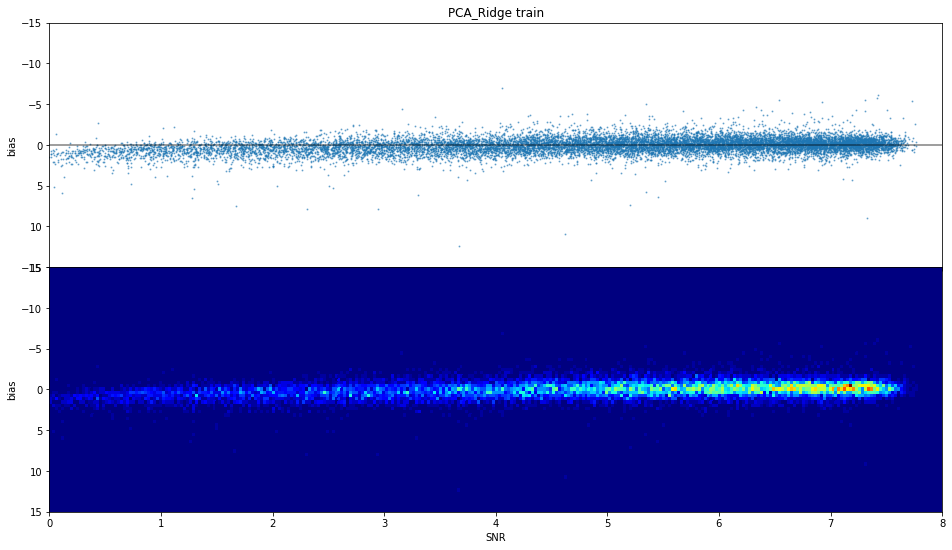

In [179]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCA_Ridge train")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

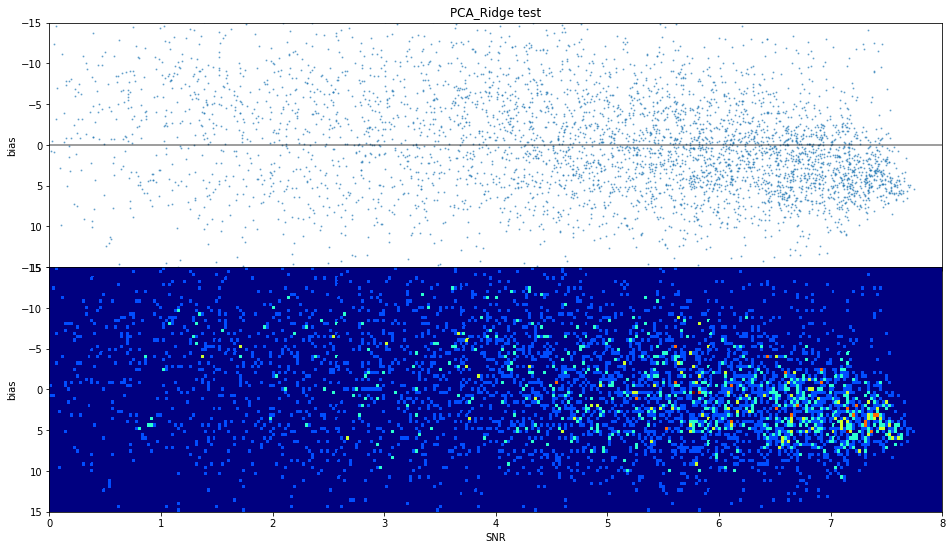

In [180]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_te,bias_te, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_te,bias_te, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCA_Ridge test")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

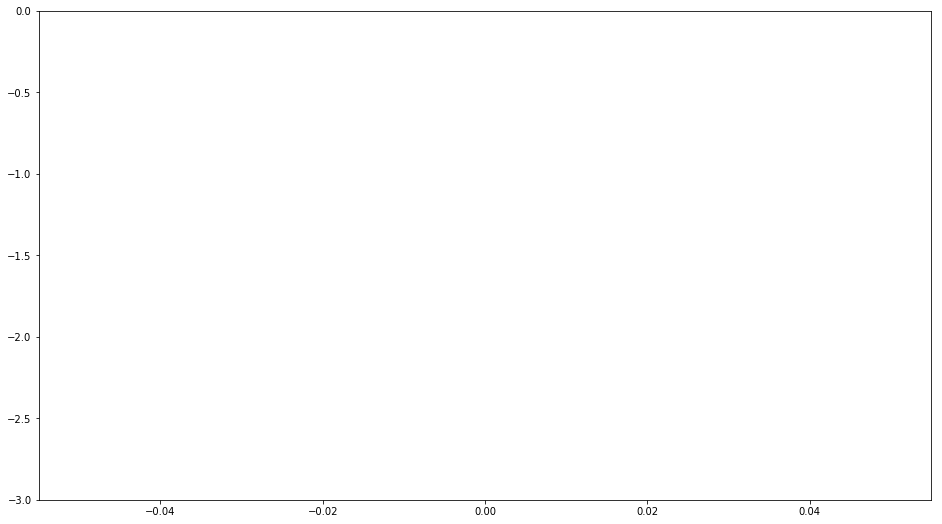

Max Amplitude:  0   NaN
dtype: float64


In [181]:
compute_bias_metric(bias_te, SNR_te,-3,0)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


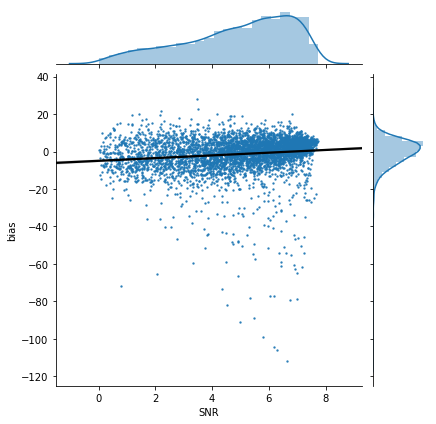

In [182]:
bias_plot(y_te, y_pred_te, df_OCU_te)

# ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV


regr_ElNetCV = ElasticNetCV(cv=5, random_state=0, l1_ratio=0.99)
regr_ElNetCV.fit(x_tr_der.sort_index(), y_tr_der.sort_index())
y_pred_ElNetCV = regr_ElNetCV.predict(x_te_der)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\skle

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\skle

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\skle

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\skle

# Elastic Net  

In [193]:
from sklearn.linear_model import ElasticNet

MSE_en_pca,R2_en_pca,Biasm_en_pca,train_size = cross_validation_regular(pd.DataFrame(pca_tr),y_tr,df_OCU_tr,'ElasticNet(alpha=1e-6, random_state=0)',4,1)  #changed alpha to 1e-3

Fold # 1 Test mean squared error: 5.87
Fold # 1 Test R2: 0.99
Fold # 1 Test bias metric: 0.17
Fold # 2 Test mean squared error: 6.31
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.12
Fold # 3 Test mean squared error: 4.83
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 0.19
Fold # 4 Test mean squared error: 5.81
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 0.14
Training Sample Size:  10021


In [194]:
bias_plot(y_te, y_pred_ElNet, df_OCU_te)

NameError: name 'y_pred_ElNet' is not defined

# Model comparison 

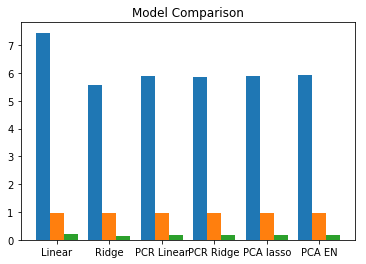

In [55]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

data = {'Linear':[MSE_lin,R2_lin,Biasm_lin],'Ridge':[MSE_rid,R2_rid,Biasm_rid],'PCR_Linear':[SE_lin_pca,R2_lin_pca,Biasm_lin_pca],
       'PCR_Ridge':[MSE_rid_pca,R2_rid_pca,Biasm_rid_pca]}

MSE_comparison = [MSE_lin,MSE_rid,SE_lin_pca,MSE_rid_pca,MSE_lasso_pca,MSE_en_pca]
R2_comparison = [R2_lin,R2_rid,R2_lin_pca,R2_rid_pca,R2_lasso_pca,R2_en_pca]
Bias_metric_comparison = np.array([Biasm_lin,Biasm_rid,Biasm_lin_pca,Biasm_rid_pca,Biasm_lasso_pca,Biasm_en_pca]).flatten()
Models = ['Linear','Ridge','PCR Linear','PCR Ridge','PCA lasso','PCA EN']
def subcategorybar(X, vals, title,width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.title(title)
    
subcategorybar(Models, [MSE_comparison,R2_comparison,Bias_metric_comparison],'Model Comparison',width=0.8)

plt.show()


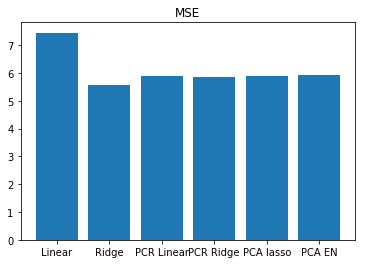

In [56]:
subcategorybar(Models, [MSE_comparison],'MSE')

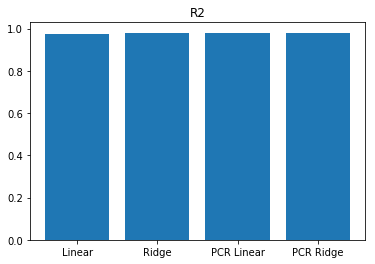

In [182]:
subcategorybar(Models, [R2_comparison],'R2')

In [57]:
R2_comparison

[0.973715564856844,
 0.9804443021363762,
 0.9791697084838199,
 0.9792846260350868,
 0.9791737678542003,
 0.9789924909539637]

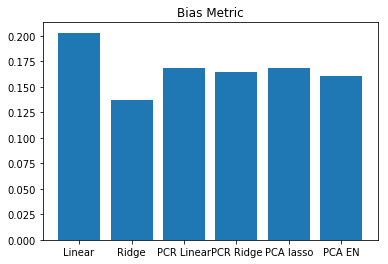

In [58]:
subcategorybar(Models, [Bias_metric_comparison],'Bias Metric')

In [150]:
print(MSE_comparison)

[7.44721094995852, 5.573014458757832, 5.881068557877591, 5.847594353045814]


In [151]:
print(r)

[0.973715564856844, 0.9804443021363762, 0.9791697084838199, 0.9792846260350868]


In [195]:
MSE_lasso_pca,R2_lasso_pca,Biasm_lasso_pca,train_size = cross_validation_regular(pd.DataFrame(pca_tr),y_tr,df_OCU_tr,'Lasso(alpha=1e-6)',4,1)  #changed alpha t

Fold # 1 Test mean squared error: 5.34
Fold # 1 Test R2: 0.99
Fold # 1 Test bias metric: 0.17
Fold # 2 Test mean squared error: 5.00
Fold # 2 Test R2: 0.98
Fold # 2 Test bias metric: 0.15
Fold # 3 Test mean squared error: 4.94
Fold # 3 Test R2: 0.98
Fold # 3 Test bias metric: 0.18
Fold # 4 Test mean squared error: 6.03
Fold # 4 Test R2: 0.98
Fold # 4 Test bias metric: 0.11
Training Sample Size:  10021
